# Project -5

Project Description:-
In this project, I will be applying Machine Learning approaches(and eventually comparing them) for classifying whether a person is suffering from heart disease or not, using one of the most used dataset — Cleveland Heart Disease dataset.


In [156]:
#Importing library to load the data
import pandas as pd

In [157]:
#Loading the csv file into dataframe format in df
df = pd.read_csv("Heart_Disease.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [158]:
#Adding columns name to the dataset
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [159]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [160]:
#Checking shape of the data
df.shape

(200, 14)

In [161]:
# This will print the names of all columns.
df.columns  

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [162]:
# This will give Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


As we can see that there are 202 rows in df.shape and here in this observation we can see that 303 not-null value present
so there is no missing value present in the dataset.

In [163]:
#As we see above in df.head() there are some ? values present in the dataset. I am replace with Nan
import numpy as np
df=df.replace('?',np.NaN)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [164]:
#To show the total count of missing values present in each column in the dataset

df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64

As per above observation i can see that out of 200 rows in ca and thal has 198 and 166 rows are missing value.
so i will drop these columns instead of replace missing value with meanor median. Also for columns trestbps,chol,fbs,thalach,exang,oldpeak i will replace nan value with mean of that column.

In [165]:
#Droping the column containing higher missing values
df.drop(['thal','ca'],axis=1,inplace=True)

In [166]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
target       int64
dtype: object

In [167]:
#Checking count of null values across all columns
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
target        0
dtype: int64

In [168]:
#Treatment of missing values by replacing with mean/mode/median
df['trestbps'] = df['trestbps'].astype(float)
df['trestbps'] = df.trestbps.fillna(df.trestbps.mean())

In [169]:
df['chol'] = df['chol'].astype(float)
df['chol'] = df.chol.fillna(df.chol.mean())

In [170]:
df['fbs'].describe()

count     193
unique      2
top         0
freq      125
Name: fbs, dtype: object

In [171]:
CV =0
df['fbs'] = df['fbs'].fillna(CV)
df['fbs']=df['fbs'].astype(int)

In [172]:
df['thalach'].describe()

count     147
unique     59
top       140
freq       12
Name: thalach, dtype: object

In [173]:
CV =140
df['thalach'] = df['thalach'].fillna(CV)
df['thalach']=df['thalach'].astype(int)

In [174]:
df['exang'].describe()

count     147
unique      2
top         1
freq       95
Name: exang, dtype: object

In [175]:
CV =1
df['exang'] = df['exang'].fillna(CV)
df['exang']=df['exang'].astype(int)

In [176]:
df['oldpeak'].describe()

count     144
unique     14
top         0
freq       40
Name: oldpeak, dtype: object

In [177]:
CV =0
df['oldpeak'] = df['oldpeak'].fillna(CV)
df['oldpeak']=df['oldpeak'].astype(float)

In [178]:
df['slope'].describe()

count     98
unique     3
top        2
freq      53
Name: slope, dtype: object

In [179]:
CV =2
df['slope'] = df['slope'].fillna(CV)
df['slope']=df['slope'].astype(int)

In [180]:
#Converting target varible into label as 0 = Heart Disease not present and for 1,2,3,4 =Present

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [181]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

Now after treatment with missing value for all columns above i  can see that now there is no missing value present in the
dataset as all missing value is replaced.

In [182]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int32
restecg       int64
thalach       int32
exang         int32
oldpeak     float64
slope         int32
target        int64
dtype: object

In [183]:
#Checking the description of dataset for better understanding the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.340000,0.735000,127.355000,0.740000,0.951000,2.065000,0.745000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.474898,0.683455,20.315575,0.439735,1.110344,0.471046,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,0.000000,2.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,130.500000,1.000000,0.500000,2.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,140.000000,1.000000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,1.000000


Observation:-

1. The count of variables is 200 across all columns so i can say that there is no missing value present in the dataset.
2. the mean is higher in some column than median and in some columns median is high than mean so by this observation i can say
   that the skewnees is present in the dataset and the data is not normally distributed.    
3. the minimum age in the dataset is 35 and maximum age is 77.
4. the difference between min and max is high in dataset so range is high.
5. the difference between 75% and maximum is high so outliers are present in the dataset.

In [184]:
#importing Some library to visualize the dataset and finding some observation
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

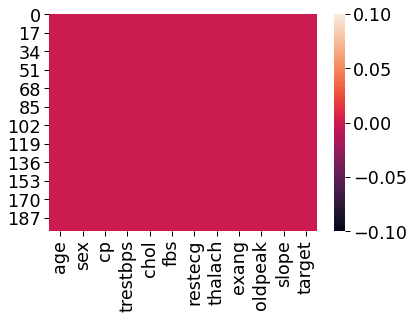

In [185]:
#Checking missing values by plotting heatmap
sns.heatmap(df.isnull())

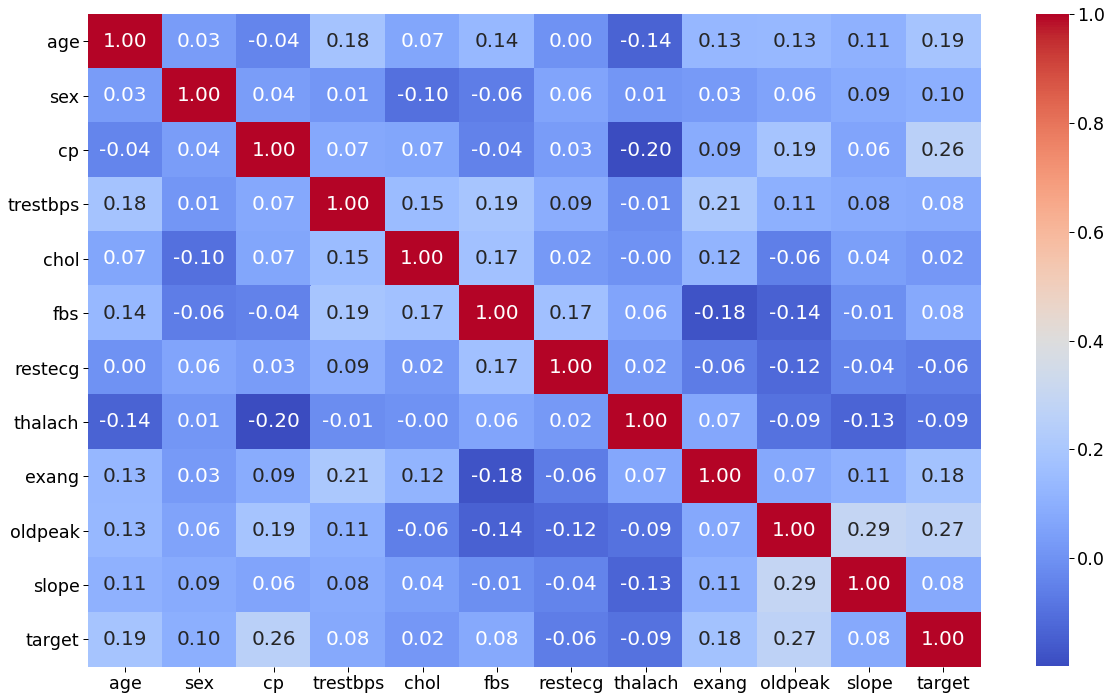

In [186]:
#Checking How data features are corelated with each other:-
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')

Observation:-    
1.As per observation we can see that the some columns are good corelated with our target variable.
2.Columns like oldpeak,exang,cp,age,sex are very good and positively corelated with the target variable.
3.columns like restecg,thalach,are negatively corelated with the target.
4.Highest positive corelated column:- oldpeak
5.Highest -ve corelated column :- thalach

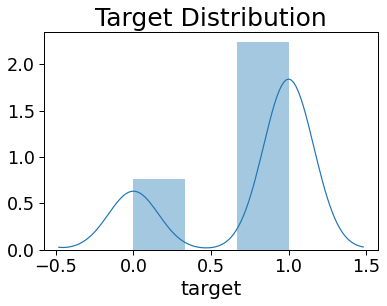

In [187]:
#Checking Distribution of target variable
#Checking how my target variable distributed
sns.distplot(df['target'])
plt.title("Target Distribution")
plt.show()

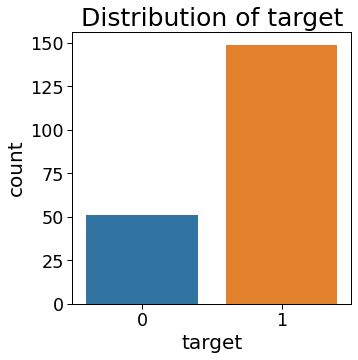

In [188]:
plt.figure(figsize=(5,5))
sns.countplot(df['target'])
plt.title("Distribution of target")
plt.show()

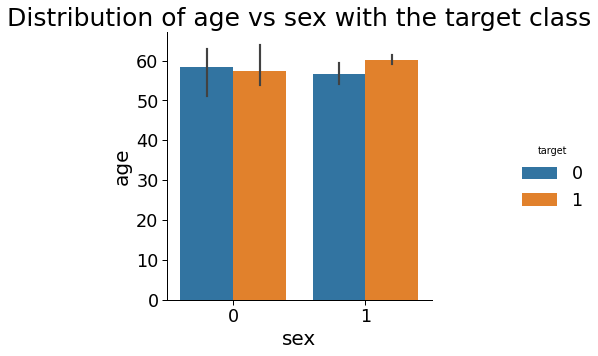

In [189]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()




As per above observation we can find that female(0) with high age less possibility heart disease as compare to
male(1) with higher age has high possibility of heart disease

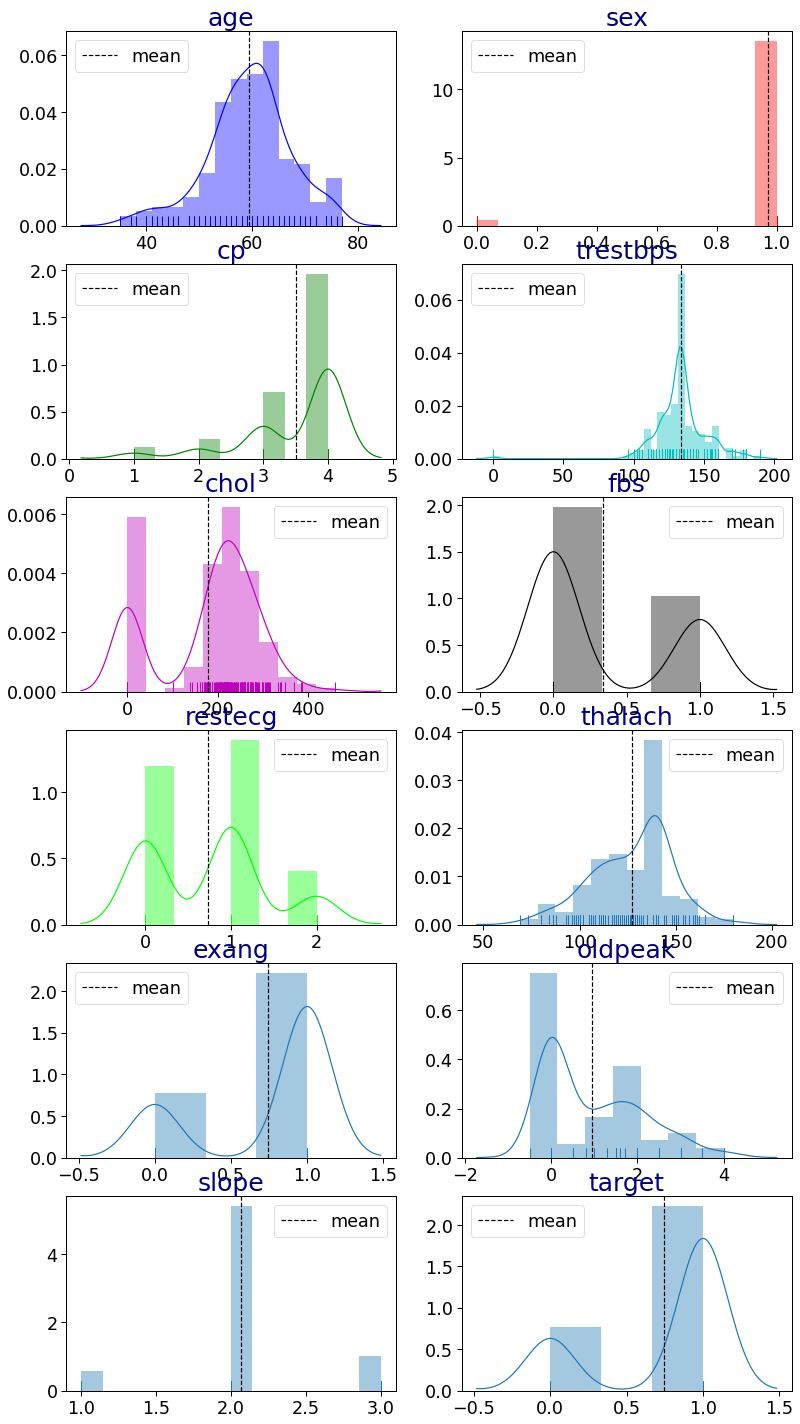

In [190]:
#Checking normal distribution of columns present in the dataset
import warnings
warnings.filterwarnings('ignore')
import itertools

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'target']
length = len(cols)

cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")


As per abobe observaation we can say that there is no any column present in the dataset which is distributed normally.
So it means that skewness is present and we have to proceed with data cleaning process for clean the data.

In [201]:
collist = df.columns.values
ncol=12
nrows=10


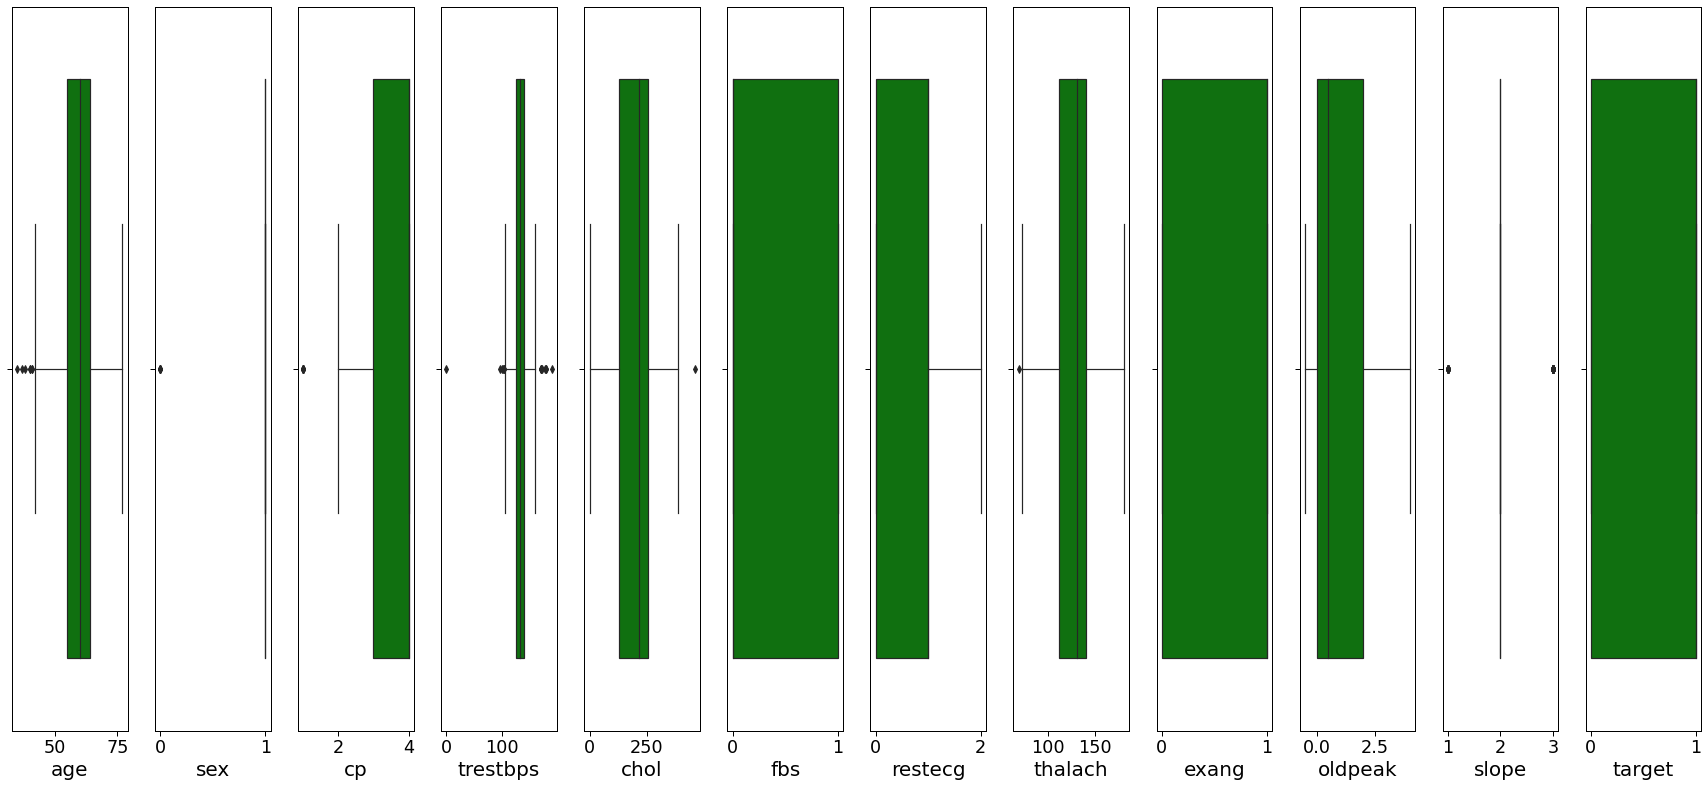

In [204]:
plt.figure(figsize = (2*ncol,5*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color ='green',orient='h')
    plt.tight_layout()


In [205]:
#Outliers detection by zscore method
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold =3
new_df = df[(z<3).all(axis=1)]
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63,1,4,140.000000,260.0,0,1,112,1,3.0,2,1
1,44,1,4,130.000000,209.0,0,1,127,0,0.0,2,0
2,60,1,4,132.000000,218.0,0,1,140,1,1.5,3,1
3,55,1,4,142.000000,228.0,0,1,149,1,2.5,1,1
4,66,1,3,110.000000,213.0,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158.000000,170.0,0,1,138,1,0.0,2,1
194,46,1,4,134.000000,310.0,0,0,126,0,0.0,2,1
197,55,1,4,122.000000,223.0,1,1,100,0,0.0,2,1
198,58,1,4,133.763889,385.0,1,2,140,1,0.0,2,0


In [206]:
df.shape

(200, 12)

In [207]:
#Percentage Loss of data after removing outliers
percentage_loss=((17)/183)*100
percentage_loss

9.289617486338798

In [208]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age           9.00
sex           0.00
cp            1.00
trestbps     14.25
chol        125.25
fbs           1.00
restecg       1.00
thalach      28.00
exang         1.00
oldpeak       2.00
slope         0.00
target        1.00
dtype: float64


In [209]:
df_new1 = df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(130, 12)


In [210]:
#Seprating independent and target variable
x= new_df.drop("target",axis=1)
y= new_df["target"] #Target variable

In [211]:
#Linear Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x= pca.fit_transform(x)
x.shape

(183, 10)

In [ ]:
#Scaling the dataset to minimize the distances in the dataset for better train the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [218]:
y.shape

(183, 1)

In [219]:
#Checking skewness present in the dataset
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach    -0.409769
exang      -1.102593
oldpeak     0.823429
slope       0.210521
target     -1.132724
dtype: float64

In [220]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x= power_transform(x,method="yeo-johnson")

# Since Outcome has only two variables we will use binary classification model

In [232]:
#Finding Best Random State

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = accuracy_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    



Best Accuracy 91.30434782608695 found on random_state 97


In [233]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size =.20,random_state =97)

In [234]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),SGDClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score of ", m, "is :")
    print(accuracy_score(y_test,predm)*100)
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy Score of  LogisticRegression() is :
86.48648648648648
[[ 3  5]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.85      1.00      0.92        29

    accuracy                           0.86        37
   macro avg       0.93      0.69      0.73        37
weighted avg       0.88      0.86      0.84        37



Accuracy Score of  GaussianNB() is :
91.8918918918919
[[ 5  3]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.91      1.00      0.95        29

    accuracy                           0.92        37
   macro avg       0.95      0.81      0.86        37
weighted avg       0.93      0.92      0.91        37



Accuracy Score of  SVC() is :
78.37837837837837
[[ 0  8]
 [ 0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           

In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [241]:
#Hyperparameter Tuning by using GridSearchCV to find best parameters so my model performs at his best
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_features': ['auto', 'sqrt'],'n_estimators':[100,200,300],'bootstrap':[True, False]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 100}


In [243]:
#using the finded parameters creating and testing the model
rf = RandomForestClassifier(bootstrap=True,max_features='sqrt',n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf= rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


91.8918918918919
[[ 5  3]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.91      1.00      0.95        29

    accuracy                           0.92        37
   macro avg       0.95      0.81      0.86        37
weighted avg       0.93      0.92      0.91        37



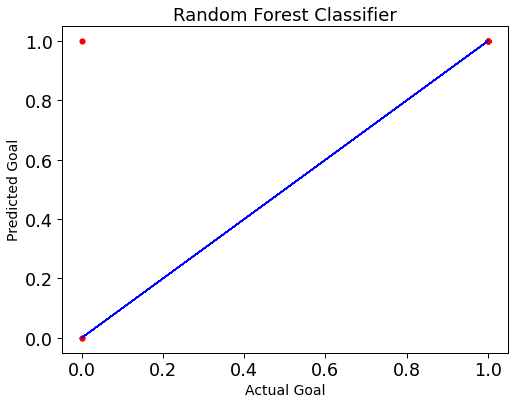

In [244]:
#Plotting figure to see the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Goal",fontsize = 14)
plt.ylabel("Predicted Goal",fontsize =14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 10-Fold Cross validation
cross_val_score(rf, x_train, y_train, cv=10)

array([0.6       , 0.73333333, 0.73333333, 0.73333333, 0.73333333,
       0.73333333, 0.71428571, 0.71428571, 0.78571429, 0.64285714])

In [249]:
#Scaling the dataset to minimize the distances in the dataset for better train the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t= sc.fit_transform(x)

In [253]:
for j in range(2,10):
    rfscore = cross_val_score(rf,x_t,y,cv=j)
    rfc = rfscore.mean()
    print('AT CV = ',j)
    print("cross validation score is :- ",rfc*100)

AT CV =  2
cross validation score is :-  77.58600095556616
AT CV =  3
cross validation score is :-  77.04918032786885
AT CV =  4
cross validation score is :-  75.41062801932367
AT CV =  5
cross validation score is :-  76.47147147147146
AT CV =  6
cross validation score is :-  77.59856630824372
AT CV =  7
cross validation score is :-  77.04517704517706
AT CV =  8
cross validation score is :-  76.45750988142292
AT CV =  9
cross validation score is :-  77.53968253968253


# Model Saving

In [256]:
#Model Saving with best model RandomForestRegressor
import joblib 

joblib.dump(rf,'rffile.obj')

['rffile.obj']

In [257]:
#Load the saved model to predict the value
#Loading to see my model
rf_from_joblib = joblib.load('rffile.obj')
rf_from_joblib

RandomForestClassifier(max_features='sqrt')

In [258]:
#Predicting the test result
k=rf_from_joblib.predict(x_test)
k

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [259]:
# Saving The predictions in csv file
import numpy as np
import pandas as pd
prediction = pd.DataFrame(k, columns=['Heart_Disease_Prediction']).to_csv('HD_prediction.csv')